In [ ]:
pip install wooldridge

In [ ]:
pip install stargazer

# EJERCICIOS EN COMPUTADORA

## Problema 2

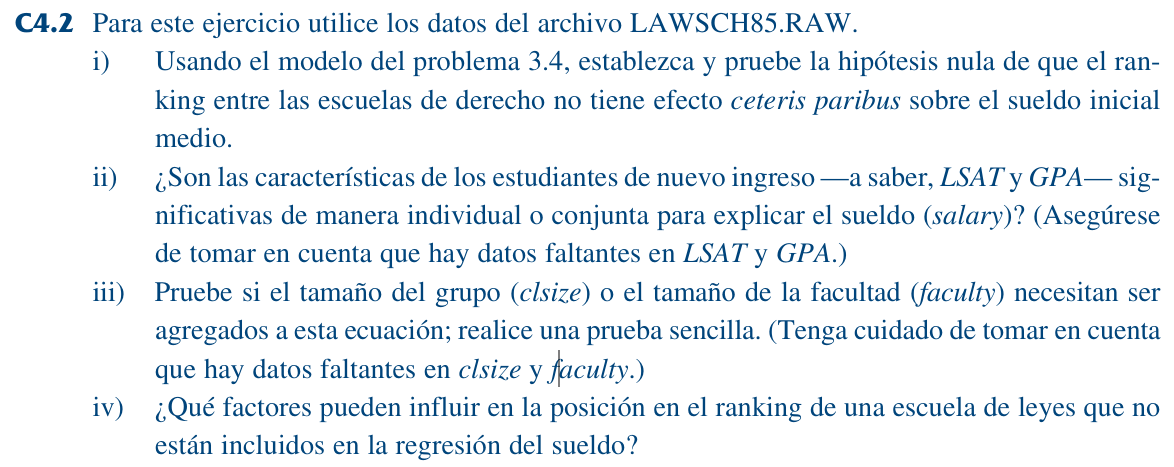

In [ ]:
import statsmodels.api as sm
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from wooldridge import data
from stargazer.stargazer import Stargazer
from scipy.stats import t
from IPython.core.display import HTML

In [ ]:
# Cargar el dataset
df = data('lawsch85')
df.head()

,rank,salary,cost,LSAT,GPA,libvol,faculty,age,clsize,north,...,east,west,lsalary,studfac,top10,r11_25,r26_40,r41_60,llibvol,lcost
0,128,31400.0,8340.0,155.0,3.15,216.0,45.0,12.0,210.0,1,...,0,0,10.354563,4.666667,0,0,0,0,5.375278,9.028818
1,104,33098.0,6980.0,160.0,3.50,256.0,44.0,113.0,190.0,0,...,0,0,10.407228,4.318182,0,0,0,0,5.545177,8.850804
2,34,32870.0,16370.0,155.0,3.25,424.0,78.0,134.0,270.0,0,...,1,0,10.400315,3.461539,0,0,1,0,6.049734,9.703206
3,49,35000.0,17566.0,157.0,3.20,329.0,136.0,89.0,277.0,0,...,1,0,10.463103,2.036765,0,0,0,1,5.796058,9.773721
4,95,33606.0,8350.0,162.0,3.38,332.0,56.0,70.0,150.0,0,...,0,1,10.422460,2.678571,0,0,0,0,5.805135,9.030017


In [ ]:
df = df.dropna(subset=["salary", "LSAT", "GPA", "rank"])
X = df[["LSAT", "GPA", "rank"]]  # Variables independientes
X = sm.add_constant(X)  # Agregar término constante
Y = df["salary"]  # Variable dependiente

# Ajustar el modelo de regresión
model = sm.OLS(Y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                 salary   R-squared:                       0.767
Model:                            OLS   Adj. R-squared:                  0.762
Method:                 Least Squares   F-statistic:                     151.1
Date:                Sun, 26 Jan 2025   Prob (F-statistic):           2.03e-43
Time:                        00:13:54   Log-Likelihood:                -1434.3
No. Observations:                 142   AIC:                             2877.
Df Residuals:                     138   BIC:                             2888.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -5.219e+04   2.58e+04     -2.022      0.0

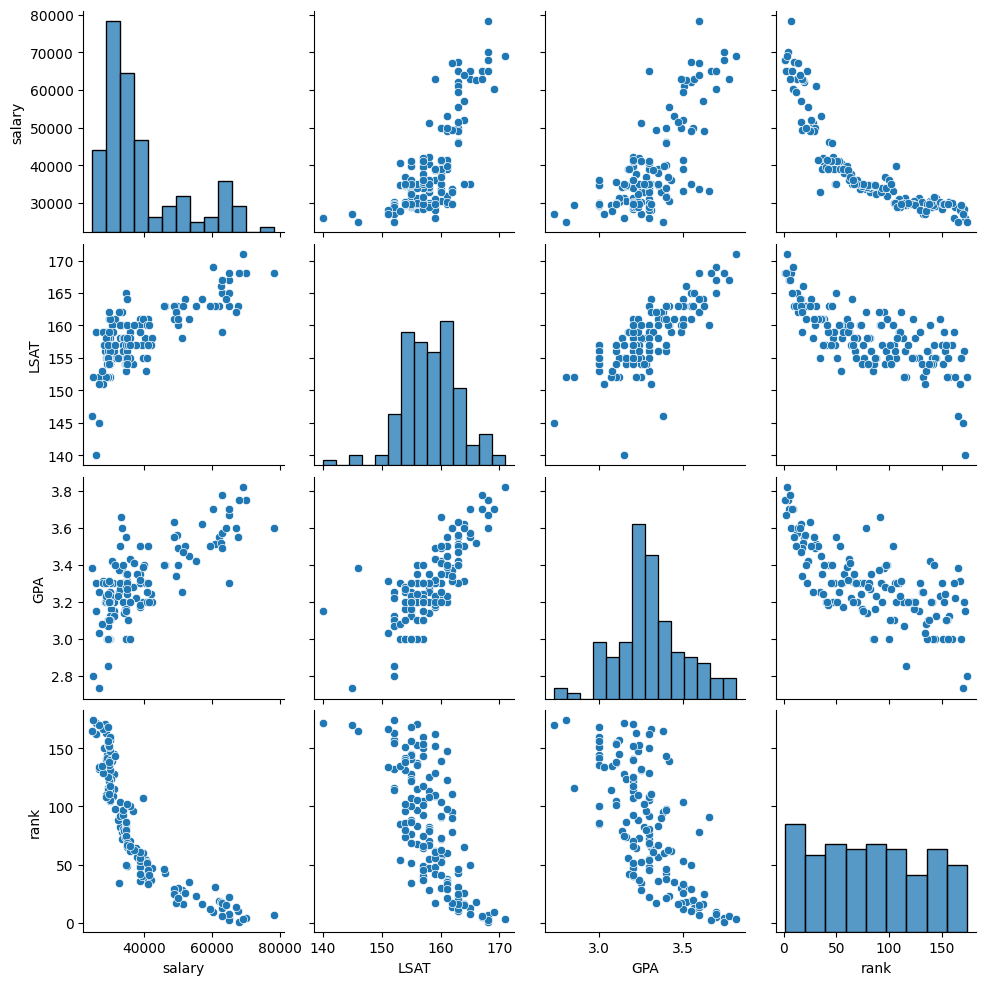

In [ ]:
sns.pairplot(df[["salary", "LSAT", "GPA", "rank"]])

In [ ]:
# i) Prueba de hipótesis: rank no tiene efecto sobre salary
# H0: beta_rank = 0
# Ha: beta_rank != 0
rank_p_value = model.pvalues["rank"]
rank_t_stat = model.tvalues["rank"]
df_residuals = model.df_resid

print(f"p-valor para rank: {rank_p_value}")
if rank_p_value < 0.05:
    print("Rechazamos H0: El ranking tiene un efecto significativo sobre el sueldo inicial medio.")
else:
    print("No rechazamos H0: El ranking no tiene un efecto significativo sobre el sueldo inicial medio.")

p-valor para rank: 2.072179640308332e-16
Rechazamos H0: El ranking tiene un efecto significativo sobre el sueldo inicial medio.


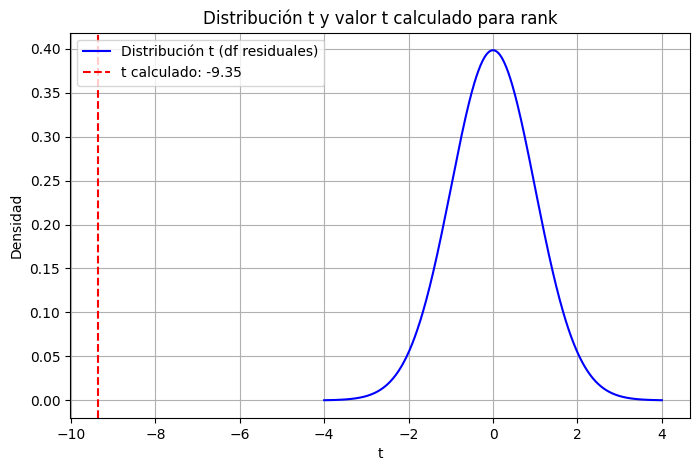

In [ ]:
# Gráfica de la distribución t y el valor t calculado
x = np.linspace(-4, 4, 500)
density = t.pdf(x, df_residuals)

plt.figure(figsize=(8, 5))
plt.plot(x, density, label="Distribución t (df residuales)", color="blue")
plt.axvline(rank_t_stat, color="red", linestyle="--", label=f"t calculado: {rank_t_stat:.2f}")
plt.title("Distribución t y valor t calculado para rank")
plt.xlabel("t")
plt.ylabel("Densidad")
plt.legend()
plt.grid()
plt.show()

In [ ]:
# ii) Significancia de LSAT y GPA (individual y conjunta)
lsat_p_value = model.pvalues["LSAT"]
gpa_p_value = model.pvalues["GPA"]
print(f"p-valor para LSAT: {lsat_p_value}")
print(f"p-valor para GPA: {gpa_p_value}")
if lsat_p_value < 0.05:
    print("LSAT es significativo individualmente para explicar salary.")
else:
    print("LSAT no es significativo individualmente para explicar salary.")

if gpa_p_value < 0.05:
    print("GPA es significativo individualmente para explicar salary.")
else:
    print("GPA no es significativo individualmente para explicar salary.")

p-valor para LSAT: 0.032699137463366966
p-valor para GPA: 0.005296747649154627
LSAT es significativo individualmente para explicar salary.
GPA es significativo individualmente para explicar salary.


In [ ]:
# Prueba conjunta: H0: beta_LSAT = beta_GPA = 0
reduced_X = df[["rank"]]
reduced_X = sm.add_constant(reduced_X)
reduced_model = sm.OLS(Y, reduced_X).fit()
f_test = model.compare_f_test(reduced_model)
print(f"Prueba conjunta (F-test) para LSAT y GPA: {f_test}")

Prueba conjunta (F-test) para LSAT y GPA: (13.766032962335071, 3.53825904666247e-06, 2.0)


In [ ]:
# iii) Necesidad de agregar clsize y faculty
# H0: beta_clsize = beta_faculty = 0
variables_adicionales = ["clsize", "faculty"]
df_full = df.dropna(subset=variables_adicionales)  # Eliminar filas con valores faltantes
X_full = df_full[["LSAT", "GPA", "rank", "clsize", "faculty"]]
X_full = sm.add_constant(X_full)
Y_full = df_full["salary"]
full_model = sm.OLS(Y_full, X_full).fit()
print(full_model.summary())

                            OLS Regression Results                            
Dep. Variable:                 salary   R-squared:                       0.782
Model:                            OLS   Adj. R-squared:                  0.773
Method:                 Least Squares   F-statistic:                     93.88
Date:                Sun, 26 Jan 2025   Prob (F-statistic):           1.41e-41
Time:                        00:25:01   Log-Likelihood:                -1379.9
No. Observations:                 137   AIC:                             2772.
Df Residuals:                     131   BIC:                             2789.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -5.783e+04   2.62e+04     -2.204      0.0

In [ ]:
reduced_X_full = df_full[["LSAT", "GPA", "rank"]]
reduced_X_full = sm.add_constant(reduced_X_full)
reduced_model_full = sm.OLS(Y_full, reduced_X_full).fit()
f_test_full = full_model.compare_f_test(reduced_model_full)
print(f"Prueba conjunta (F-test) para clsize y faculty: {f_test_full}")

Prueba conjunta (F-test) para clsize y faculty: (4.106579339176522, 0.01862992186685418, 2.0)


In [ ]:
# iv) Factores no incluidos en el modelo que podrían influir en el ranking
print("Factores posibles que podrían influir en el ranking: ubicación geográfica de la escuela, prestigio histórico, financiamiento, calidad del currículo, redes de exalumnos.")

Factores posibles que podrían influir en el ranking: ubicación geográfica de la escuela, prestigio histórico, financiamiento, calidad del currículo, redes de exalumnos.
